#Blast Freezer Truck Schedule Optimization for Supply Chain Efficiency
##Final Report

###Library Import and Environment Setup
Initializes the Python environment by importing necessary libraries for data manipulation, visualization, and statistical analysis. It also mounts Google Drive to access project datasets.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/645")

In [ ]:
from brooks import *

###Data Loading and Preprocessing
Reads the dataset from an Excel file, converts the date column to datetime format, and extracts the week number from the date to group data on a weekly basis.

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/645/Datasets/final_data.xlsx")
data["date"] = pd.to_datetime(data["date"])
data["week"] = data["date"].dt.isocalendar().week
processing_time = data.groupby("week")["hours"].sum().reset_index()
processing_time.columns = ["week", "TPT_perweek"]

###Data Visualization
Generates histogram plots for individual processing hours and total processing time per week, using different colors for distinction and applying kernel density estimation for smoother distribution curves.

<Axes: xlabel='hours', ylabel='Count'>

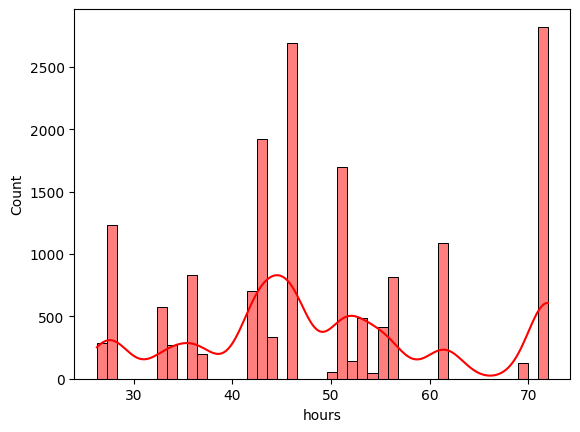

In [ ]:
sns.histplot(data["hours"], color='red', kde=True)

Histogram overlaid with a kernel density estimation (KDE) curve, representing the distribution of individual freezing hours. The x-axis denotes the hours, and the y-axis shows the count of occurrences within the dataset. The bars indicate the frequency of specific hour ranges where freezing occurred, with peaks suggesting the most common freezing times. The red KDE line provides a smooth estimate of the distribution, showing multiple peaks, which suggests that the freezing times are not normally distributed and may have several modes.

<Axes: xlabel='TPT_perweek', ylabel='Count'>

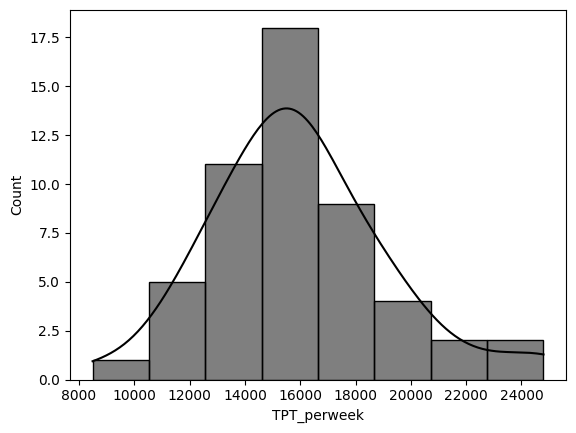

In [ ]:
sns.histplot(processing_time["TPT_perweek"], color='black', kde=True)

Histogram with a KDE curve, illustrating the total processing time per week (TPT_perweek). The x-axis signifies the total processing time in hours, and the y-axis represents the count of weeks with corresponding total processing times. This distribution seems to be unimodal with a peak around the center of the dataset, which could indicate a normal distribution. However, without further statistical testing, it cannot be definitively said to follow a normal distribution. The tail on the right suggests some weeks with very high total processing times, possibly outliers or periods of high demand.







###Statistical Distribution Testing
Performs Chi-Squared tests on the processing hours and weekly total processing time to fit them against normal, gamma, and triangular distributions, extracting parameters like mean, standard deviation, and mode for each distribution.

In [ ]:
#Chi-Squared test for hours
(mean, stdv) = test_distribution(data['hours'], distribution="normal")
(alpha, beta) = test_distribution(data["hours"], distribution="gamma")
(min, mode, max) = test_distribution(data["hours"], distribution="triangular")

#Chi-Squared test for weekly processing time
(mean, stdv) = test_distribution(processing_time["TPT_perweek"], distribution="normal")
(alpha, beta) = test_distribution(processing_time["TPT_perweek"], distribution="gamma")
(min, mode, max) = test_distribution(processing_time["TPT_perweek"], distribution="triangular")

For a normal distribution, the mean estimate is 49.624955 and the standard deviation estimate is 13.389290.
The test statistic for a normal distribution is 94608.142639 and the p-value is 0.000000.
For a gamma distribution, the alpha estimate is 13.421428 and the beta estimate is 0.270457.
The test statistic for a gamma distribution is 96970.811010 and the p-value is 0.000000.
For a triangular distribution, the min estimate is 15.448938, the mode estimate is 72.000000, and the max estimate is 72.003638.
The test statistic for a triangular distribution is 63762.080041 and the p-value is 0.000000.
For a normal distribution, the mean estimate is 15960.149038 and the standard deviation estimate is 3195.510397.
The test statistic for a normal distribution is 4.834841 and the p-value is 0.680110.
For a gamma distribution, the alpha estimate is 25.321580 and the beta estimate is 0.001587.
The test statistic for a gamma distribution is 3.244821 and the p-value is 0.861469.
For a triangular dis

###Simulation for Truck Scheduling
Simulates the total freezing time for a range of truck schedules using a normal distribution for freezing times, calculating the average, 50th percentile, and 95th percentile freezing times across iterations to inform scheduling decisions.

In [ ]:
import numpy as np

truck_schedule = list(range(10, 41, 5))

iterations = 1000
for scheduled_trucks in truck_schedule:
    random_gen = np.random.default_rng(54321)
    print(scheduled_trucks)
    freezing_time_per_week = []
    for j in range(iterations):
        total_freezing_time = 0
        pallets_loaded = 24 * scheduled_trucks
        for pallet_count in range(pallets_loaded):
            freeze_duration = random_gen.normal(49.624955, 13.39)
            total_freezing_time += freeze_duration
        freezing_time_per_week.append(total_freezing_time)
    print("Total freezing time per week: %f" % (sum(freezing_time_per_week) / iterations))
    fifty_percentile = np.percentile(freezing_time_per_week, q=50)
    print("50th percentile for total freezing time per week: %f" % (fifty_percentile))
    ninety_fifth_percentile = np.percentile(freezing_time_per_week, q=95)
    print("95th percentile for total freezing time per week: %f" % (ninety_fifth_percentile))


10
Total freezing time per week: 11892.622975
50th percentile for total freezing time per week: 11887.875582
95th percentile for total freezing time per week: 12246.908759
15
Total freezing time per week: 17841.626205
50th percentile for total freezing time per week: 17832.524569
95th percentile for total freezing time per week: 18277.538217
20
Total freezing time per week: 23786.568230
50th percentile for total freezing time per week: 23779.176684
95th percentile for total freezing time per week: 24294.971158
25
Total freezing time per week: 29734.808854
50th percentile for total freezing time per week: 29740.458363
95th percentile for total freezing time per week: 30286.939851
30
Total freezing time per week: 35690.758062
50th percentile for total freezing time per week: 35689.590771
95th percentile for total freezing time per week: 36296.473405
35
Total freezing time per week: 41651.121758
50th percentile for total freezing time per week: 41642.428871
95th percentile for total freez

The provided results from a simulation represent the total freezing time required for different numbers of scheduled trucks per week. As the number of trucks increases in increments of 5, starting from 10 to 40, both the average total freezing time per week and the 50th percentile (median) total freezing time increase linearly. This indicates that the total freezing time scales predictably with the number of trucks scheduled. The 95th percentile values, which are higher than the average and median, represent the upper end of the range, suggesting that most weeks will have a total freezing time below this value, but occasionally, the freezing time can be expected to be as high as the 95th percentile value. This information is critical for logistics planning, ensuring that the schedule accommodates the typical freezing time demand, while also preparing for peak times.